<a href="https://colab.research.google.com/github/ericksanchezcorrea/Data_Science/blob/main/An%C3%A1lisis_datos_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
nf = pd.read_csv('/content/netflix_dataset.csv')

# Cantidad de películas y series de Netflix

In [43]:
nf['type'].value_counts()
nf['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

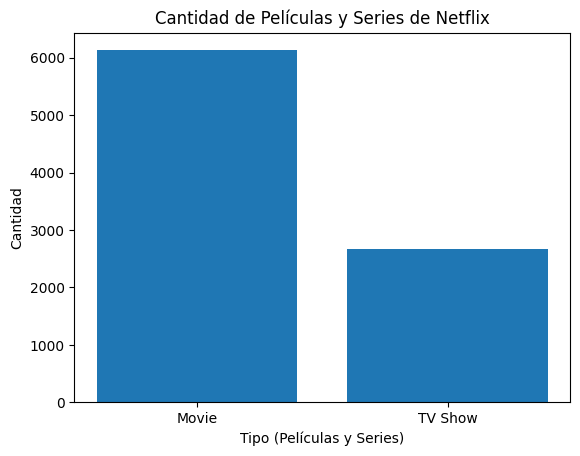

In [44]:
plt.bar(nf['type'].value_counts().index, nf['type'].value_counts().values)
plt.title('Cantidad de Películas y Series de Netflix')
plt.xlabel('Tipo (Películas y Series)')
plt.ylabel('Cantidad')
plt.show()

In [45]:
nf_movies=nf[nf['type']=='Movie']

In [46]:
nf_movies_columns = nf_movies[['type','release_year','country','duration']]

In [47]:
n_most_countrys = nf_movies_columns['country'].value_counts().nlargest(5)

# Los 5 países con más películas

In [48]:
n_most_countrys

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Name: count, dtype: int64

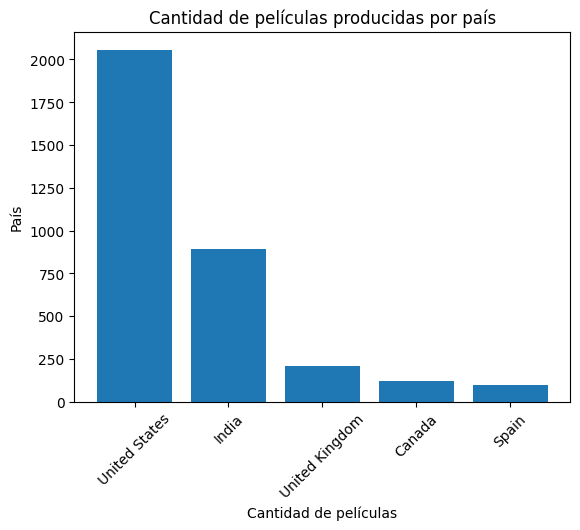

In [49]:
plt.bar(n_most_countrys.index, n_most_countrys.values)
plt.title('Cantidad de películas producidas por país')
plt.xlabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.ylabel('País')
plt.show()

In [50]:
#La duración es un string y se elimina 'min' de la misma
nf_movies_columns['duration']=nf_movies_columns['duration'].str.replace(' min','')

<ipython-input-50-cbe879cbbdd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_movies_columns['duration']=nf_movies_columns['duration'].str.replace(' min','')


In [51]:
#Tiempo medio de duración de las películas
mean_duration = nf_movies_columns['duration'].dropna().astype(int).mean()

In [52]:
#Se Reemplaza los NA por la media y se convierte el tipo de dato a int
nf_movies_columns['duration']=nf_movies_columns['duration'].fillna(mean_duration).astype(int)

<ipython-input-52-1f7926cb9ed6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_movies_columns['duration']=nf_movies_columns['duration'].fillna(mean_duration).astype(int)


# Gráfica de duración de las películas a lo largo de los años

Text(0.5, 1.0, 'Duración de las películas a lo largo de los años')

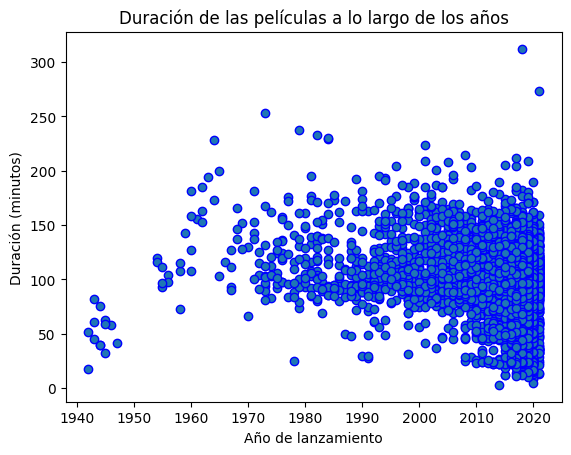

In [53]:
plt.scatter('release_year','duration', data=nf_movies_columns, edgecolor='blue')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración (minutos)')
plt.title('Duración de las películas a lo largo de los años')

In [54]:
group_movies_mean_by_year = nf_movies_columns.groupby(['release_year'],as_index=False)['duration'].mean()
group_movies_mean_by_year.head(3)

,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000


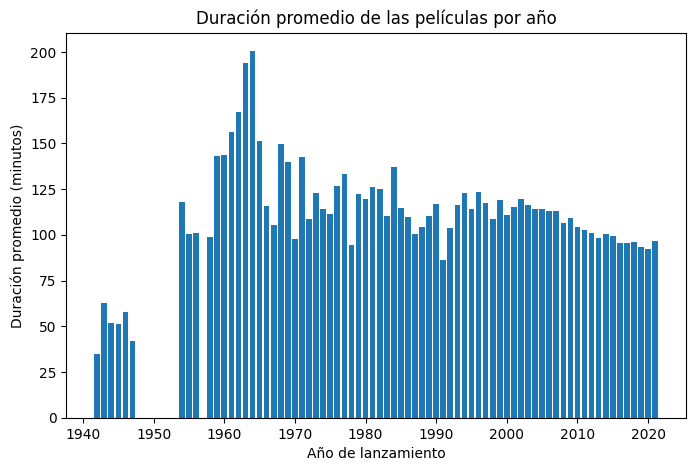

In [55]:
plt.figure(figsize=(8,5))
plt.bar('release_year', 'duration', data=group_movies_mean_by_year)
plt.title('Duración promedio de las películas por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración promedio (minutos)')
plt.show()

#Las 3 películas más antiguas

In [56]:
nf_movies.nsmallest(3,'release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...


# Cantidad de Películas por Calificación

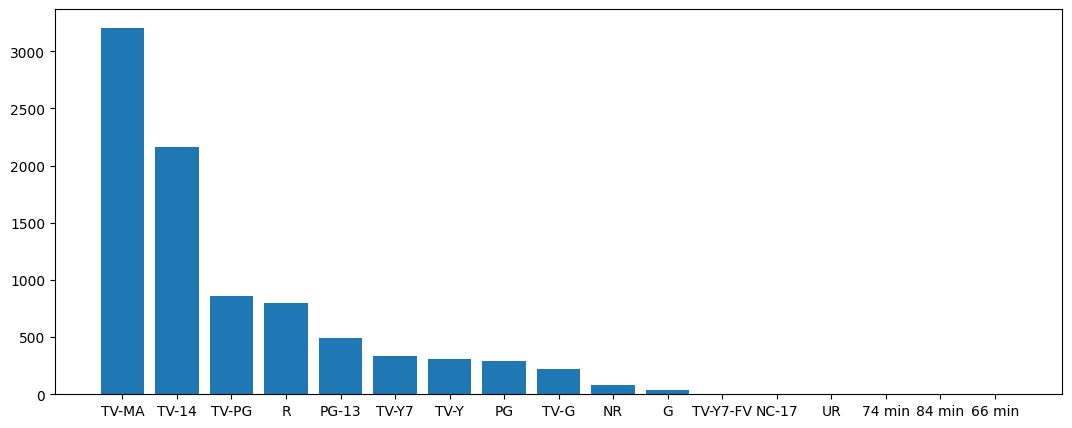

In [79]:
rating = nf['rating'].value_counts()
plt.figure(figsize=(13,5))
plt.bar(rating.index, rating.values)
plt.show()

#Cantidad de Películas y Series por Calificación

In [81]:
rating_counts = nf.groupby(['rating', 'type'],as_index=True).size().unstack(fill_value=0)
rating_counts

type,Movie,TV Show
rating,,
66 min,1,0
74 min,1,0
84 min,1,0
G,41,0
NC-17,3,0
NR,75,5
PG,287,0
PG-13,490,0
R,797,2


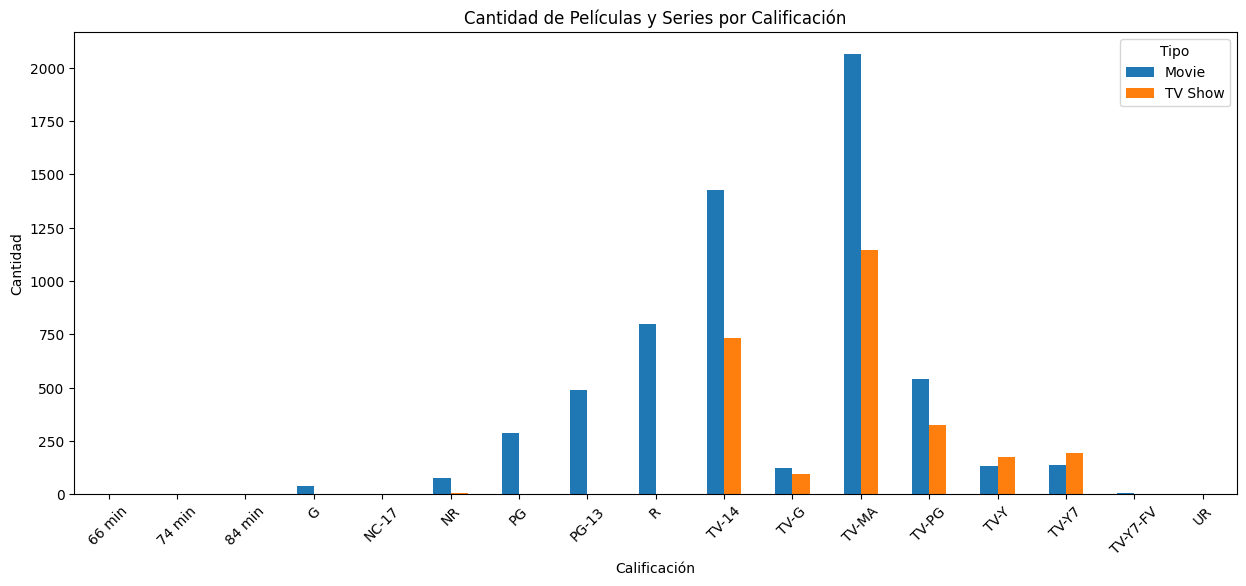

In [82]:
rating_counts.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Películas y Series por Calificación')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.show()